In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('/content/airfoil_noise_data.csv')
print(df.head())
print("--------------------------")

#check data types and  missing values
print(df.info())
print("--------------------------")

#check summary statistics
print(df.describe())

     x0   x1      x2    x3        x4        y
0   800  0.0  0.3048  71.3  0.002663  126.201
1  1000  0.0  0.3048  71.3  0.002663  125.201
2  1250  0.0  0.3048  71.3  0.002663  125.951
3  1600  0.0  0.3048  71.3  0.002663  127.591
4  2000  0.0  0.3048  71.3  0.002663  127.461
--------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1503 non-null   int64  
 1   x1      1503 non-null   float64
 2   x2      1503 non-null   float64
 3   x3      1503 non-null   float64
 4   x4      1503 non-null   float64
 5   y       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
None
--------------------------
                 x0           x1           x2           x3           x4  \
count   1503.000000  1503.000000  1503.000000  1503.000000  1503.000000   
mean    2886.380572     6.782302     0.136548    50.860745    

In [6]:
# Check for missing values
print(df.isnull().sum())

x0    0
x1    0
x2    0
x3    0
x4    0
y     0
dtype: int64


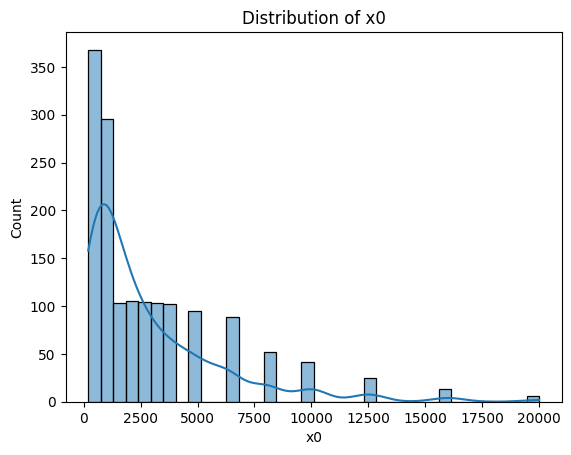

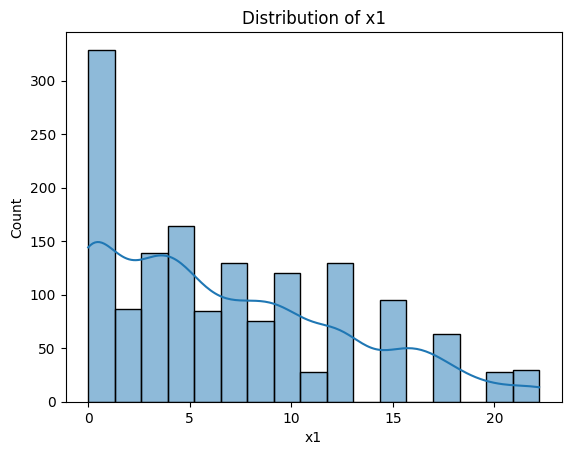

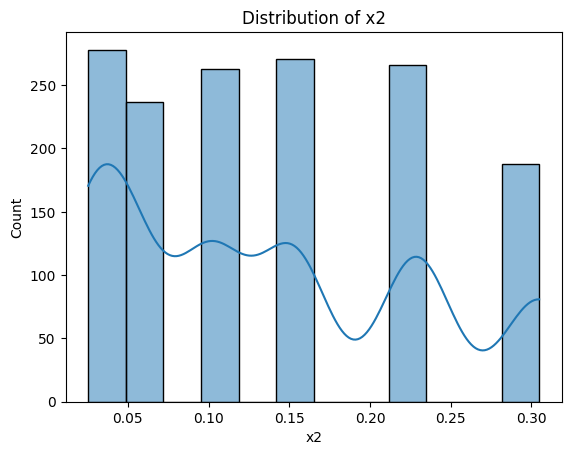

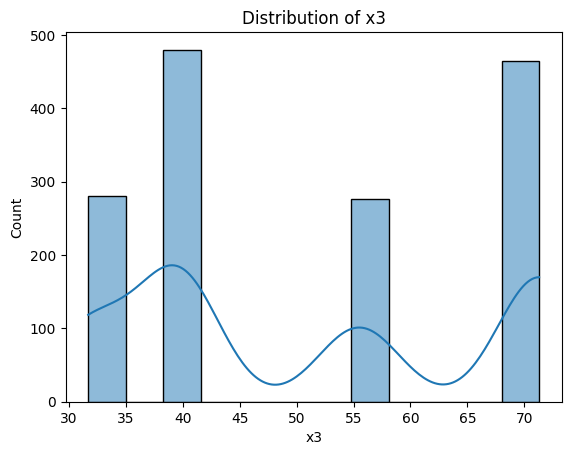

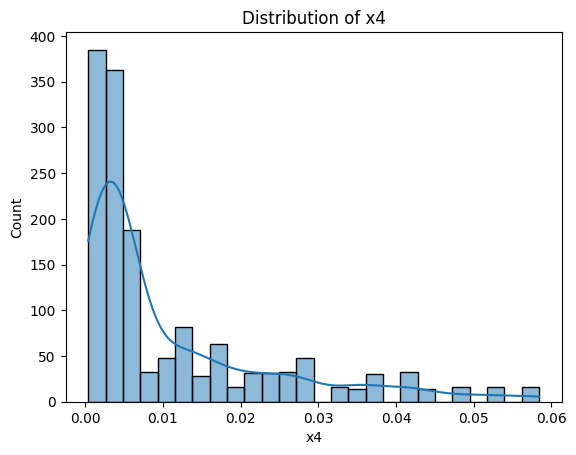

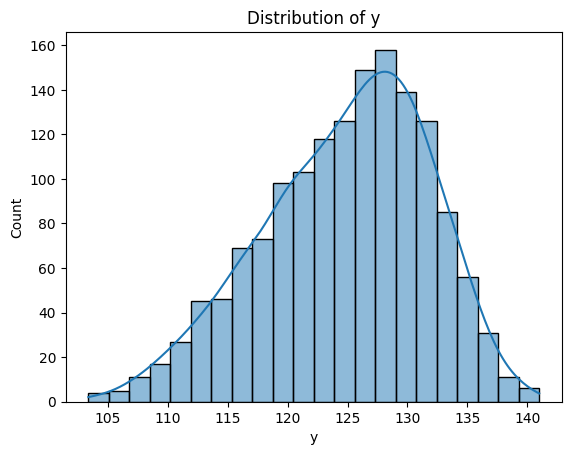

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


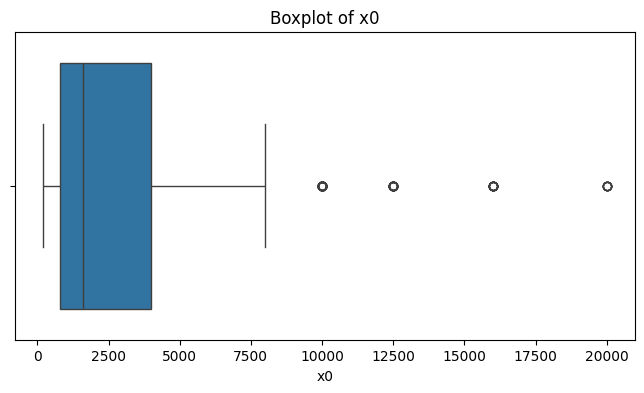

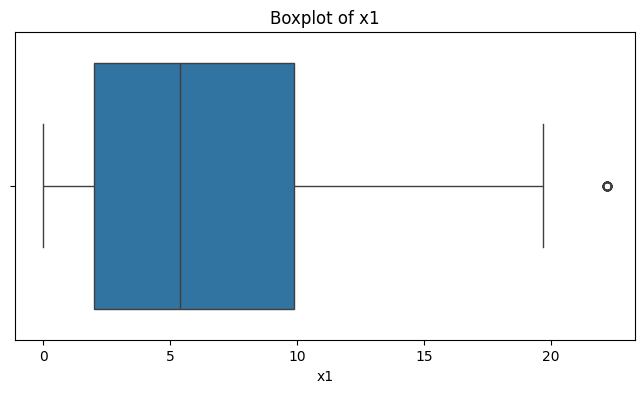

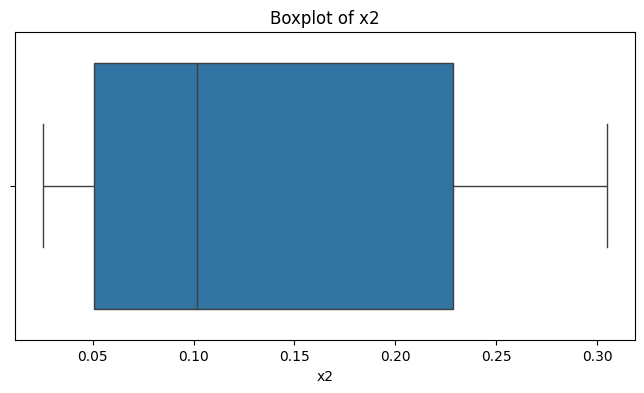

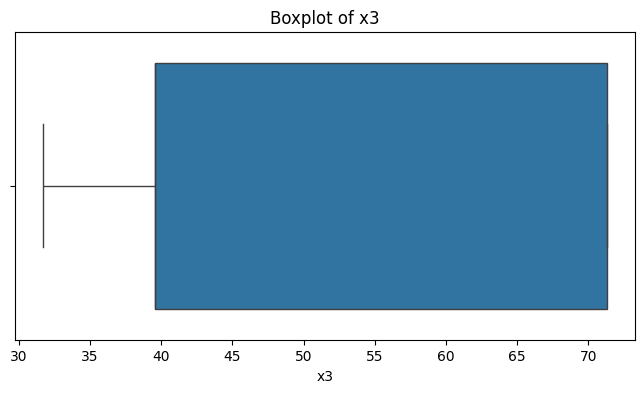

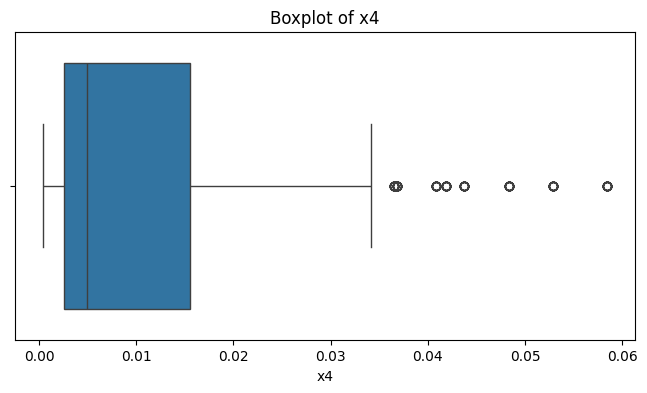

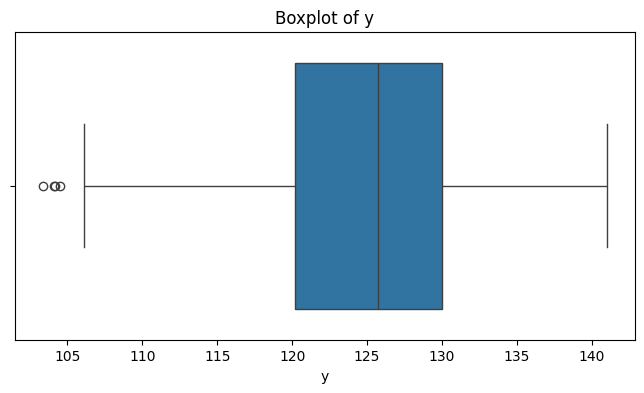

In [8]:
#Check for outliers
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


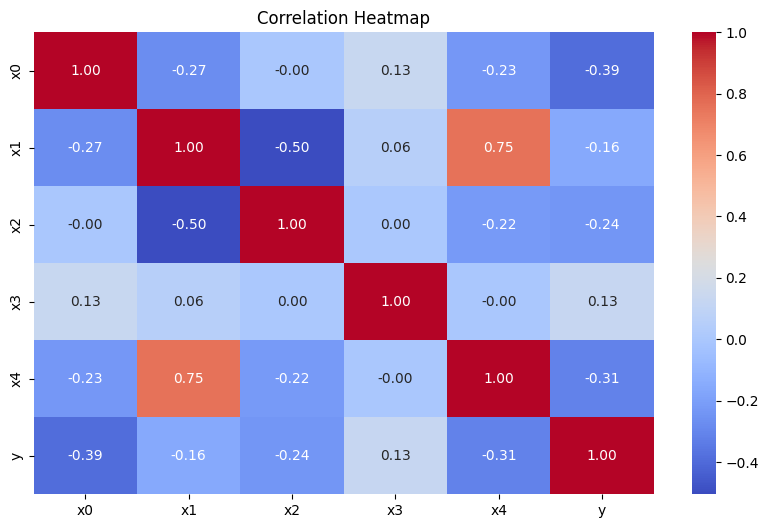

In [9]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Split the data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

In [12]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#create a decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

In [14]:
#Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
#make prediction on the test set
y_pred = model.predict(X_test)

In [16]:
#evalueate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.876174498338868
R-squared: 0.8827077586744035
